In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
transactions = pd.read_csv('transactions.csv')
print(transactions.head())
print(transactions.info())
print(f"Dataset shape: {transactions.shape}")

   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   206  CASH_OUT    62927.08   C473782114           0.00            0.00   
1   380   PAYMENT    32851.57  C1915112886           0.00            0.00   
2   570  CASH_OUT  1131750.38  C1396198422     1131750.38            0.00   
3   184  CASH_OUT    60519.74   C982551468       60519.74            0.00   
4   162   CASH_IN    46716.01  C1759889425     7668050.60      7714766.61   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isPayment  \
0  C2096898696       649420.67       712347.75        0          0   
1   M916879292            0.00            0.00        0          1   
2  C1612235515       313070.53      1444820.92        1          0   
3  C1378644910        54295.32       182654.50        1          0   
4  C2059152908      2125468.75      2078752.75        0          0   

   isMovement  accountDiff  
0           1    649420.67  
1           0         0.00  
2           1    818679.85  


count    1.000000e+03
mean     5.373080e+05
std      1.423692e+06
min      0.000000e+00
25%      2.933705e+04
50%      1.265305e+05
75%      3.010378e+05
max      1.000000e+07
Name: amount, dtype: float64


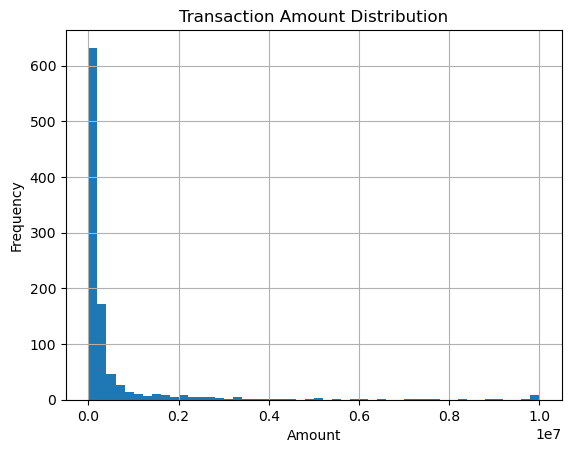

In [3]:
print(transactions['amount'].describe())
transactions['amount'].hist(bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [4]:
transactions["isPayment"] = transactions["type"].apply(
    lambda x: 1 if x in ["PAYMENT", "DEBIT"] else 0
)
transactions["isMovement"] = transactions["type"].apply(
    lambda x: 1 if x in ["CASH_OUT", "TRANSFER"] else 0
)
transactions['accountDiff'] = abs(
    transactions['oldbalanceOrg'] - transactions['oldbalanceDest']
)

In [5]:
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
label = transactions['isFraud']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
print(f"Training accuracy: {reg.score(X_train, y_train):.2f}")
print(f"Testing accuracy: {reg.score(X_test, y_test):.2f}")

Training accuracy: 0.84
Testing accuracy: 0.85


In [10]:
print("Model coefficients:")
print(reg.coef_)

Model coefficients:
[[ 2.42110403 -0.61050379  2.10147921 -0.987915  ]]


In [11]:
new_transactions = np.array([
    [123456.78, 0.0, 1.0, 54670.1],
    [98765.43, 1.0, 0.0, 8524.75],
    [543678.31, 1.0, 0.0, 510025.5],
    [6472.54, 1.0, 0.0, 55901.23]
])

In [12]:
new_transactions_normalized = scaler.transform(new_transactions)

c:\Users\bigma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
predictions = reg.predict(new_transactions_normalized)
probabilities = reg.predict_proba(new_transactions_normalized)

In [14]:
print("Predictions for new transactions:")
print(predictions)

Predictions for new transactions:
[0 0 0 0]


In [15]:
print("Prediction probabilities for new transactions:")
print(probabilities)

Prediction probabilities for new transactions:
[[0.61352284 0.38647716]
 [0.99806334 0.00193666]
 [0.99645189 0.00354811]
 [0.99836193 0.00163807]]
